## check GPU availabilty

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ", len(physical_devices))
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Number of GPUs Available:  1


## Paths

In [ ]:
CUR_DIR = '/content/' #this may be different runnig local
MAT_DIR= CUR_DIR+'mat/'
TRAIN_MAT_PATH = MAT_DIR + 'train/train/'
TEST_MAT_PATH = MAT_DIR + 'test/test/'
VOICE_DIR = CUR_DIR+'voice/'
TRAIN_VOICE_PATH = VOICE_DIR+'train/train/'
TEST_VOICE_PATH = VOICE_DIR+'test/test/'
DRIVE_PATH = CUR_DIR+'drive/MyDrive/Bachelor_Project/'
DRIVE2_PATH = CUR_DIR+'drive/MyDrive/Bachelor_Project_Part2/'
DRIVE3_PATH = CUR_DIR+'drive/MyDrive/Bachelor_Project_Part3/'
#TRAIN_VOICE_OLD_PATH = CUR_DIR+'train/train/'
#TEST_VOICE_OLD_PATH = CUR_DIR+'test/test/'
#TRAIN_IMG_PATH = CUR_DIR+'train/train-img/'
#TEST_IMG_PATH = CUR_DIR+'test/test-img/'
TRAIN_MAT_PATH = MAT_DIR + 'train/'
TEST_MAT_PATH = MAT_DIR + 'test/'
MOZILLA_PATH= CUR_DIR+'mozilla/'
MOZILLA_VALID_TRAIN = CUR_DIR+'mozilla/cv-valid-train/'
MOZILLA_VALID_DEV = CUR_DIR+'mozilla/cv-valid-dev/'
MOZILLA_VALID_TEST = CUR_DIR+'mozilla/cv-valid-test/'
SHEMO_DF = DRIVE_PATH + 'shemo/'
SHEMO_VOICE = VOICE_DIR + 'shemo/'
FINAL_DF = DRIVE_PATH + 'finaldf/'

In [ ]:
! mkdir $MAT_DIR
! mkdir $VOICE_DIR
! mkdir $TRAIN_MAT_PATH
! mkdir $TEST_MAT_PATH

## mount google drive

In [ ]:
from google.colab import drive
drive.mount(CUR_DIR+'drive/', force_remount=True)
#%cd '{CUR_DIR}drive/MyDrive/Bachelor_Project/'
#%ls

Mounted at /content/drive/


## import libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from glob import glob
import librosa
import librosa.display
import soundfile as sf
import scipy.signal as signal
import gc
import shutil

## spoken-language-identification dataset


In [ ]:
! mkdir ~/.kaggle
! cp $DRIVE_PATH/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download toponowicz/spoken-language-identification

100% 14.9G/14.9G [08:53<00:00, 30.2MB/s]
100% 14.9G/14.9G [08:53<00:00, 30.0MB/s]


In [ ]:
%%capture
!unzip {CUR_DIR}spoken-language-identification.zip -d $VOICE_DIR

In [ ]:
!rm {CUR_DIR}spoken-language-identification.zip

### create dataframe

In [ ]:
train_data_dir=np.array(glob(TRAIN_VOICE_PATH+"*"))
traindf = pd.DataFrame(train_data_dir,columns = ['file'])
format_len = len('flac')
traindf['ID']= traindf['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
traindf

,file,ID
0,/content/voice/train/train/es_m_f16e9da2ba7126...,es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment...
1,/content/voice/train/train/es_m_b8e0e6f56f02e6...,es_m_b8e0e6f56f02e6f8f79cc360958e5982.fragment...
2,/content/voice/train/train/de_m_502293f2297515...,de_m_502293f229751563d1768dd2367a6b29.fragment...
3,/content/voice/train/train/en_m_81995ee8a5e990...,en_m_81995ee8a5e990193b7858ec4b158e48.fragment...
4,/content/voice/train/train/en_f_9a47e3d56398b8...,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...
...,...,...
73075,/content/voice/train/train/de_m_4d099776261f22...,de_m_4d099776261f2267d3148a7e7e766d14.fragment...
73076,/content/voice/train/train/en_f_058b70233667e1...,en_f_058b70233667e1b64506dddf9f9d6b46.fragment...
73077,/content/voice/train/train/es_m_768526f634547e...,es_m_768526f634547e2b45fd84556ecd70f6.fragment...
73078,/content/voice/train/train/de_m_fc6bd6bb9d66a8...,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...


In [ ]:
test_data_dir=np.array(glob(TEST_VOICE_PATH+"*"))
testdf = pd.DataFrame(test_data_dir,columns = ['file'])
format_len = len('flac')
testdf['ID']= testdf['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
testdf

,file,ID
0,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...
1,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...
2,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...
3,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...
4,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...
...,...,...
535,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...
536,/content/voice/test/test/es_m_08111ce8d6a7ebc6...,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...
537,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...
538,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...


In [ ]:
traindf['lang'] = traindf['ID'].apply(lambda x: x.split('_')[0])
testdf['lang'] = testdf['ID'].apply(lambda x: x.split('_')[0])

##

## Shemo dataset

In [ ]:
! mkdir $SHEMO_VOICE

In [ ]:
!wget -O male.zip "https://www.dropbox.com/s/xfi3hi927yxixa9/male.zip?dl=0"

--2023-08-25 08:19:35--  https://www.dropbox.com/s/xfi3hi927yxixa9/male.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xfi3hi927yxixa9/male.zip [following]
--2023-08-25 08:19:35--  https://www.dropbox.com/s/raw/xfi3hi927yxixa9/male.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceea4a303c16cdf443bda9d0233.dl.dropboxusercontent.com/cd/0/inline/CCc7fmX0uXrSQxxAq9g9BUhTNI-TU2HE73CyxutieHFwPbJYknD8PYv4sm21qjb4GC0PcC1UGG7F-ez0hp5874hgzgElCG2TeMwy_f_1Ep0m98xaBxxYKmM0BLDFI-CZ5uwc0ecvLprAMnT9zad0p13V/file# [following]
--2023-08-25 08:19:35--  https://uceea4a303c16cdf443bda9d0233.dl.dropboxusercontent.com/cd/0/inline/CCc7fmX0uXrSQxxAq9g9BUhTNI-TU2HE73CyxutieHFwPbJYknD8PYv4sm21qjb4GC0PcC1UGG7F-ez0hp5874hgzgElCG2TeMwy_f_1Ep

In [ ]:
!wget -O female.zip "https://www.dropbox.com/s/4t6mep8mo4yf81f/female.zip?dl=0"

--2023-08-25 08:19:58--  https://www.dropbox.com/s/4t6mep8mo4yf81f/female.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4t6mep8mo4yf81f/female.zip [following]
--2023-08-25 08:19:58--  https://www.dropbox.com/s/raw/4t6mep8mo4yf81f/female.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15f585881e4b25150a613854d5.dl.dropboxusercontent.com/cd/0/inline/CCe2e3pxEVHLZz7iI06Pmtge_SXbdNJvmOUeSDPSLxPHEmN83BAqeYiC2cnFAa_4NObBneUl1njgEtRPRp7AHLw_TA5i7wm7w800o-KrfdlqAMBhHGjREWxkI5za8Dq1iCfBTpK87SMvKV4b851tQ_LX/file# [following]
--2023-08-25 08:19:59--  https://uc15f585881e4b25150a613854d5.dl.dropboxusercontent.com/cd/0/inline/CCe2e3pxEVHLZz7iI06Pmtge_SXbdNJvmOUeSDPSLxPHEmN83BAqeYiC2cnFAa_4NObBneUl1njgEtRPRp7AHLw_TA5i7wm7w800

In [ ]:
%%capture
!unzip {CUR_DIR}male.zip -d $VOICE_DIR
!unzip {CUR_DIR}female.zip -d $VOICE_DIR

In [ ]:
!rm {CUR_DIR}male.zip
!rm {CUR_DIR}female.zip

In [ ]:
! mv $VOICE_DIR/male/* $SHEMO_VOICE
! mv $VOICE_DIR/female/* $SHEMO_VOICE

In [ ]:
shemo_train_df = pd.read_csv(SHEMO_DF+"train.csv")
shemo_validation_df = pd.read_csv(SHEMO_DF+"validation.csv")
shemo_test_df = pd.read_csv(SHEMO_DF+"test.csv")

In [ ]:
format_len = len('wav')
shemo_train_df['name'] = shemo_train_df['file']
shemo_train_df['file'] = shemo_train_df['file'].apply(lambda x: TRAIN_VOICE_PATH+x)
shemo_train_df['ID'] = shemo_train_df['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
shemo_train_df['lang'] = 'fa'

In [ ]:
format_len = len('wav')
shemo_validation_df['name'] = shemo_validation_df['file']
shemo_validation_df['file'] = shemo_validation_df['file'].apply(lambda x: TRAIN_VOICE_PATH+x)
shemo_validation_df['ID'] = shemo_validation_df['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
shemo_validation_df['lang'] = 'fa'

In [ ]:
format_len = len('wav')
shemo_test_df['name'] = shemo_test_df['file']
shemo_test_df['file'] = shemo_test_df['file'].apply(lambda x: TEST_VOICE_PATH+x)
shemo_test_df['ID'] = shemo_test_df['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
shemo_test_df['lang'] = 'fa'

In [ ]:
def move_shemo(name, save_prefix):
    y, sr = librosa.load(SHEMO_VOICE+name, sr=None)
    current_duration = librosa.get_duration(y=y, sr=sr)

    if current_duration >= 10:
        shutil.move(SHEMO_VOICE+name, save_prefix+name)

    silence_duration = 10 - current_duration
    silence_samples = int(silence_duration * sr)
    silence = np.zeros(silence_samples)
    new_audio = np.concatenate((y, silence), axis=0)
    sf.write(save_prefix+name, new_audio, sr)

In [ ]:
np.vectorize(move_shemo)(shemo_train_df['name'], TRAIN_VOICE_PATH)
np.vectorize(move_shemo)(shemo_validation_df['name'], TRAIN_VOICE_PATH)
np.vectorize(move_shemo)(shemo_test_df['name'], TEST_VOICE_PATH)

In [ ]:
keep_shemo_col = ['ID','file','lang']
shemo_train_df = shemo_train_df[keep_shemo_col]
shemo_validation_df = shemo_validation_df[keep_shemo_col]
shemo_test_df = shemo_test_df[keep_shemo_col]

In [ ]:
shemo_train_df

,ID,file,lang
0,M27N31.npy,/content/voice/train/train/M27N31.wav,fa
1,M46A05.npy,/content/voice/train/train/M46A05.wav,fa
2,M05S11.npy,/content/voice/train/train/M05S11.wav,fa
3,F21S25.npy,/content/voice/train/train/F21S25.wav,fa
4,F28A08.npy,/content/voice/train/train/F28A08.wav,fa
...,...,...,...
1926,M19A01.npy,/content/voice/train/train/M19A01.wav,fa
1927,F26N04.npy,/content/voice/train/train/F26N04.wav,fa
1928,M37S01.npy,/content/voice/train/train/M37S01.wav,fa
1929,F09H02.npy,/content/voice/train/train/F09H02.wav,fa


In [ ]:
shemo_validation_df

,ID,file,lang
0,F20W04.npy,/content/voice/train/train/F20W04.wav,fa
1,M25A24.npy,/content/voice/train/train/M25A24.wav,fa
2,F31A02.npy,/content/voice/train/train/F31A02.wav,fa
3,M25N06.npy,/content/voice/train/train/M25N06.wav,fa
4,M25N21.npy,/content/voice/train/train/M25N21.wav,fa
...,...,...,...
273,M17H01.npy,/content/voice/train/train/M17H01.wav,fa
274,M25N09.npy,/content/voice/train/train/M25N09.wav,fa
275,F02N04.npy,/content/voice/train/train/F02N04.wav,fa
276,M25A60.npy,/content/voice/train/train/M25A60.wav,fa


In [ ]:
shemo_test_df

,ID,file,lang
0,M26N01.npy,/content/voice/test/test/M26N01.wav,fa
1,F11S01.npy,/content/voice/test/test/F11S01.wav,fa
2,M12N68.npy,/content/voice/test/test/M12N68.wav,fa
3,F07A27.npy,/content/voice/test/test/F07A27.wav,fa
4,M12A37.npy,/content/voice/test/test/M12A37.wav,fa
...,...,...,...
465,M47N02.npy,/content/voice/test/test/M47N02.wav,fa
466,M12A54.npy,/content/voice/test/test/M12A54.wav,fa
467,F07A36.npy,/content/voice/test/test/F07A36.wav,fa
468,M12A31.npy,/content/voice/test/test/M12A31.wav,fa


### Create folders

In [ ]:
! mkdir $CUR_DIR/train
! mkdir $CUR_DIR/test

In [ ]:
! mv $TRAIN_VOICE_PATH $TRAIN_VOICE_OLD_PATH
! mv $TEST_VOICE_PATH $TEST_VOICE_OLD_PATH

In [ ]:
!mkdir $TRAIN_IMG_PATH
!mkdir $TEST_IMG_PATH

## Create spectogram

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=22050)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    SP = librosa.power_to_db(S, ref=np.max)
    np.save(save_prefix+file, SP)

#### shemo

In [ ]:
%%time
format_len = len('wav')
np.vectorize(spectrogram_mat)(TRAIN_VOICE_PATH, shemo_train_df['ID'], TRAIN_MAT_PATH, format='wav')
shemo_train_df

CPU times: user 59.8 s, sys: 42.5 s, total: 1min 42s
Wall time: 1min 3s


,ID,file,lang
0,M27N31.npy,/content/voice/train/train/M27N31.wav,fa
1,M46A05.npy,/content/voice/train/train/M46A05.wav,fa
2,M05S11.npy,/content/voice/train/train/M05S11.wav,fa
3,F21S25.npy,/content/voice/train/train/F21S25.wav,fa
4,F28A08.npy,/content/voice/train/train/F28A08.wav,fa
...,...,...,...
1926,M19A01.npy,/content/voice/train/train/M19A01.wav,fa
1927,F26N04.npy,/content/voice/train/train/F26N04.wav,fa
1928,M37S01.npy,/content/voice/train/train/M37S01.wav,fa
1929,F09H02.npy,/content/voice/train/train/F09H02.wav,fa


In [ ]:
%%time
format_len = len('wav')
np.vectorize(spectrogram_mat)(TRAIN_VOICE_PATH, shemo_validation_df['ID'], TRAIN_MAT_PATH, format='wav')
shemo_validation_df

CPU times: user 8.56 s, sys: 6.29 s, total: 14.9 s
Wall time: 9.09 s


,ID,file,lang
0,F20W04.npy,/content/voice/train/train/F20W04.wav,fa
1,M25A24.npy,/content/voice/train/train/M25A24.wav,fa
2,F31A02.npy,/content/voice/train/train/F31A02.wav,fa
3,M25N06.npy,/content/voice/train/train/M25N06.wav,fa
4,M25N21.npy,/content/voice/train/train/M25N21.wav,fa
...,...,...,...
273,M17H01.npy,/content/voice/train/train/M17H01.wav,fa
274,M25N09.npy,/content/voice/train/train/M25N09.wav,fa
275,F02N04.npy,/content/voice/train/train/F02N04.wav,fa
276,M25A60.npy,/content/voice/train/train/M25A60.wav,fa


In [ ]:
%%time
format_len = len('wav')
np.vectorize(spectrogram_mat)(TEST_VOICE_PATH, shemo_test_df['ID'], TEST_MAT_PATH, format='wav')
shemo_test_df

CPU times: user 14.7 s, sys: 10.7 s, total: 25.5 s
Wall time: 15.7 s


,ID,file,lang
0,M26N01.npy,/content/voice/test/test/M26N01.wav,fa
1,F11S01.npy,/content/voice/test/test/F11S01.wav,fa
2,M12N68.npy,/content/voice/test/test/M12N68.wav,fa
3,F07A27.npy,/content/voice/test/test/F07A27.wav,fa
4,M12A37.npy,/content/voice/test/test/M12A37.wav,fa
...,...,...,...
465,M47N02.npy,/content/voice/test/test/M47N02.wav,fa
466,M12A54.npy,/content/voice/test/test/M12A54.wav,fa
467,F07A36.npy,/content/voice/test/test/F07A36.wav,fa
468,M12A31.npy,/content/voice/test/test/M12A31.wav,fa


#### spoken language identification

In [ ]:
%%time
format_len = len('flac')
np.vectorize(spectrogram_mat)(TRAIN_VOICE_PATH, traindf['ID'], TRAIN_MAT_PATH)
traindf

CPU times: user 50min 23s, sys: 38min 21s, total: 1h 28min 45s
Wall time: 56min 5s


,file,ID,lang
0,/content/voice/train/train/es_m_f16e9da2ba7126...,es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment...,es
1,/content/voice/train/train/es_m_b8e0e6f56f02e6...,es_m_b8e0e6f56f02e6f8f79cc360958e5982.fragment...,es
2,/content/voice/train/train/de_m_502293f2297515...,de_m_502293f229751563d1768dd2367a6b29.fragment...,de
3,/content/voice/train/train/en_m_81995ee8a5e990...,en_m_81995ee8a5e990193b7858ec4b158e48.fragment...,en
4,/content/voice/train/train/en_f_9a47e3d56398b8...,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...,en
...,...,...,...
73075,/content/voice/train/train/de_m_4d099776261f22...,de_m_4d099776261f2267d3148a7e7e766d14.fragment...,de
73076,/content/voice/train/train/en_f_058b70233667e1...,en_f_058b70233667e1b64506dddf9f9d6b46.fragment...,en
73077,/content/voice/train/train/es_m_768526f634547e...,es_m_768526f634547e2b45fd84556ecd70f6.fragment...,es
73078,/content/voice/train/train/de_m_fc6bd6bb9d66a8...,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,de


In [ ]:
%%time
format_len = len('flac')
np.vectorize(spectrogram_mat)(TEST_VOICE_PATH, testdf['ID'], TEST_MAT_PATH)
testdf

CPU times: user 21.5 s, sys: 15.8 s, total: 37.3 s
Wall time: 24.3 s


,file,ID,lang
0,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de
1,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
2,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,de
3,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,en
4,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de
...,...,...,...
535,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,de
536,/content/voice/test/test/es_m_08111ce8d6a7ebc6...,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...,es
537,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de
538,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de


In [ ]:
print(traindf.iloc[0].ID)

es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment14.noise4.npy


In [ ]:
gc.collect()

106810

In [ ]:
!rm {CUR_DIR}spoken-language-identification.zip

In [ ]:
!rm $VOICE_DIR -r

## Data Generator

In [ ]:
from tensorflow import keras
import numpy as np
import os

class NumpyDataGenerator(keras.utils.Sequence):
    def __init__(self, data_folder, ids, labels, batch_size, shuffle=True, seed=None, rescale=None, subset='training'):
        self.data_folder = data_folder
        ## changed:
        #self.ids = ids
        self.file_list = ids
        #self.labels = labels
        self.file_labels = labels

        self.batch_size = batch_size
        #self.validation_split = validation_split
        self.shuffle = shuffle
        self.seed = seed
        self.rescale = rescale
        self.subset = subset

        #self._split_data()

        if self.shuffle:
            self._shuffle_data()

    #def _split_data(self):
    #    split_index = int(self.validation_split * len(self.ids))
    #    if self.subset == 'training':
    #        self.file_list = self.ids[split_index:]
    #        self.file_labels = self.labels[split_index:]
    #    else:
    #        self.file_list = self.ids[:split_index]
    #        self.file_labels = self.labels[:split_index]

    def _shuffle_data(self):
        if self.seed is not None:
            np.random.seed(self.seed)
        indices = np.random.permutation(len(self.file_list))
        self.file_list = self.file_list[indices]
        self.file_labels = self.file_labels[indices]

    #def _create_spectrogram(self, file_address): #address_prefix, given_file, format='flac'
    #  clip, sample_rate = librosa.load(file_address, sr=None) #address_prefix+given_file[:-3]+format
    #  S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, n_mels=40, hop_length=221)
    #  SP = librosa.power_to_db(S, ref=np.max)
    #  return SP

    def __len__(self):
        return len(self.file_list) // self.batch_size

    def __getitem__(self, idx):
        r = (idx + 1) * self.batch_size
        if r > len(self.file_list):
            r = len(self.file_list)
        batch_files = self.file_list[idx * self.batch_size: r]
        batch_labels = self.file_labels[idx * self.batch_size: r]

        batch_data = np.empty((len(batch_files), *(128, 431))) #(40, 998)
        for i, filename in enumerate(batch_files):
            batch_data[i,] = np.load(os.path.join(self.data_folder, filename))
            #batch_data[i,] = self._create_spectrogram(self.data_folder, filename)
            #batch_data[i,] = self._create_spectrogram(os.path.join(self.data_folder, filename[:-3]+'flac'))

        return batch_data, batch_labels

    def on_epoch_end(self, logs=None):
        if self.shuffle:
            self._shuffle_data()


In [ ]:
### in case tesdf df is ruined
testdf = pd.read_csv(DRIVE_PATH+'testdf.csv')
testdf.drop('Unnamed: 0', axis=1, inplace=True)
testdf
###

,file,ID,lang
0,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,en
1,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
2,/content/voice/test/test/es_f_50298ab71aaba850...,es_f_50298ab71aaba8508ebeef49d853df11.fragment...,es
3,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,de
4,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,en
...,...,...,...
535,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de
536,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
537,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
538,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de


In [ ]:
shemo_test_df

,ID,file,lang
0,M26N01.npy,/content/voice/test/test/M26N01.wav,fa
1,F11S01.npy,/content/voice/test/test/F11S01.wav,fa
2,M12N68.npy,/content/voice/test/test/M12N68.wav,fa
3,F07A27.npy,/content/voice/test/test/F07A27.wav,fa
4,M12A37.npy,/content/voice/test/test/M12A37.wav,fa
...,...,...,...
465,M47N02.npy,/content/voice/test/test/M47N02.wav,fa
466,M12A54.npy,/content/voice/test/test/M12A54.wav,fa
467,F07A36.npy,/content/voice/test/test/F07A36.wav,fa
468,M12A31.npy,/content/voice/test/test/M12A31.wav,fa


In [ ]:
### concat test
testdf = pd.concat([testdf, shemo_test_df.iloc[:180]], axis=0)

In [ ]:
testdf

,file,ID,lang
0,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,en
1,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
2,/content/voice/test/test/es_f_50298ab71aaba850...,es_f_50298ab71aaba8508ebeef49d853df11.fragment...,es
3,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,de
4,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,en
...,...,...,...
175,/content/voice/test/test/F22S13.wav,F22S13.npy,fa
176,/content/voice/test/test/M26A04.wav,M26A04.npy,fa
177,/content/voice/test/test/F22S02.wav,F22S02.npy,fa
178,/content/voice/test/test/M26S05.wav,M26S05.npy,fa


In [ ]:
### test encoder
X_testid = np.array(testdf['ID'].values)
y_test = np.array(testdf['lang'].values)

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
y_test = to_categorical(y_test, 4)

In [ ]:
# train encoder from test
X_trainid = np.array(traindf['ID'].values)
y_train = np.array(traindf['lang'].values)

y_train = label_encoder.transform(y_train)
y_train = to_categorical(y_train, 4)

In [ ]:
traindf

,file,ID,lang
0,/content/voice/train/train/es_m_f16e9da2ba7126...,es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment...,es
1,/content/voice/train/train/es_m_b8e0e6f56f02e6...,es_m_b8e0e6f56f02e6f8f79cc360958e5982.fragment...,es
2,/content/voice/train/train/de_m_502293f2297515...,de_m_502293f229751563d1768dd2367a6b29.fragment...,de
3,/content/voice/train/train/en_m_81995ee8a5e990...,en_m_81995ee8a5e990193b7858ec4b158e48.fragment...,en
4,/content/voice/train/train/en_f_9a47e3d56398b8...,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...,en
...,...,...,...
73075,/content/voice/train/train/de_m_4d099776261f22...,de_m_4d099776261f2267d3148a7e7e766d14.fragment...,de
73076,/content/voice/train/train/en_f_058b70233667e1...,en_f_058b70233667e1b64506dddf9f9d6b46.fragment...,en
73077,/content/voice/train/train/es_m_768526f634547e...,es_m_768526f634547e2b45fd84556ecd70f6.fragment...,es
73078,/content/voice/train/train/de_m_fc6bd6bb9d66a8...,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,de


In [ ]:
# final
np.random.seed(42)
shuffle_indices = np.random.permutation(len(X_trainid))
X_trainid = X_trainid[shuffle_indices]
y_train = y_train[shuffle_indices]

In [ ]:
import copy
def split_data(X_id, y_label, validation_split):
    split_index = int(validation_split * len(X_id))
    X_train_id = copy.deepcopy(X_id[split_index:])
    y_train_label = copy.deepcopy(y_label[split_index:])
    X_valid_id = copy.deepcopy(X_id[:split_index])
    y_valid_label = copy.deepcopy(y_label[:split_index])
    return X_train_id, y_train_label, X_valid_id, y_valid_label

In [ ]:
X_train_id, y_train_label, X_valid_id, y_valid_label = split_data(X_trainid, y_train, 0.2)

In [ ]:
X_shemo_train_id = np.array(shemo_train_df['ID'].values)
y_shemo_train_label = np.array(shemo_train_df['lang'].values)
y_shemo_train_label = label_encoder.transform(y_shemo_train_label)
y_shemo_train_label = to_categorical(y_shemo_train_label, 4)

X_shemo_validation_id = np.array(shemo_validation_df['ID'].values)
y_shemo_validation_label = np.array(shemo_validation_df['lang'].values)
y_shemo_validation_label = label_encoder.transform(y_shemo_validation_label)
y_shemo_validation_label = to_categorical(y_shemo_validation_label, 4)

In [ ]:
X_train_id = np.concatenate((X_train_id, X_shemo_train_id), axis=0)
y_train_label = np.concatenate((y_train_label, y_shemo_train_label), axis=0)
X_valid_id = np.concatenate((X_valid_id, X_shemo_validation_id), axis=0)
y_valid_label = np.concatenate((y_valid_label, y_shemo_validation_label), axis=0)

In [ ]:
print((y_valid_label[:,0] == 1.0).sum())
print((y_valid_label[:,1] == 1.0).sum())
print((y_valid_label[:,2] == 1.0).sum())
print((y_valid_label[:,3] == 1.0).sum())
print((y_train_label[:,0] == 1.0).sum())
print((y_train_label[:,1] == 1.0).sum())
print((y_train_label[:,2] == 1.0).sum())
print((y_train_label[:,3] == 1.0).sum())

4869
4912
4835
278
19491
19448
19525
1931


In [ ]:
np.save(FINAL_DF + 'X_train_id.npy', X_train_id)
np.save(FINAL_DF + 'y_train_label.npy', y_train_label)
np.save(FINAL_DF + 'X_valid_id.npy', X_valid_id)
np.save(FINAL_DF + 'y_valid_label.npy', y_valid_label)
np.save(FINAL_DF + 'X_testid.npy', X_testid)
np.save(FINAL_DF + 'y_test.npy', y_test)

In [ ]:
print(len(X_train_id), len(y_train_label), len(X_valid_id), len(y_valid_label))

60395 60395 14894 14894


In [ ]:
print(X_trainid)

['de_m_ab485e46a6cce6d4b0f4ab48c08f9a4d.fragment30.noise6.npy'
 'de_f_bc4b6dc670308726c9e267c11850a5e8.fragment3.noise7.npy'
 'en_f_cb90542ae2fd3247d519634c2f9e53a8.fragment15.noise6.npy' ...
 'de_m_d22535879801cc9c4452d9ed9de5bf61.fragment30.speed8.npy'
 'es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment24.pitch3.npy'
 'de_m_4d099776261f2267d3148a7e7e766d14.fragment22.noise10.npy']


In [ ]:
print(y_train)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [ ]:
print(X_trainid[3], y_train[3])

es_m_f7d959494477e5e7e33d4666f15311c9.fragment6.noise8.npy [0. 0. 1. 0.]


In [ ]:
print(str(y_train[0]))

[1. 0. 0. 0.]


#### testing dimension

In [ ]:
dimtest = np.load(TRAIN_MAT_PATH+'de_m_ab485e46a6cce6d4b0f4ab48c08f9a4d.fragment30.noise6.npy')
dimtest.shape

(128, 431)

In [ ]:
dimtest = np.load(TRAIN_MAT_PATH+'F20W04.npy')
dimtest.shape

(128, 431)

### define generators

In [ ]:
data_folder = TRAIN_MAT_PATH #########
batch_size = 128
validation_split = 0.2
rescale_factor = 1.0 / 255.0

params = {
    'data_folder': data_folder,
    ##'ids' : X_trainid,
    ##'labels': y_train,
    'batch_size': batch_size,
    #'validation_split': validation_split,
    'shuffle': True, #############################
    'seed': 42,
    'rescale': rescale_factor,
}

train_generator = NumpyDataGenerator(subset='training', ids= X_train_id, labels= y_train_label, **params)
valid_generator = NumpyDataGenerator(subset='validation', ids= X_valid_id, labels= y_valid_label, **params)

In [ ]:
X_testid = np.array(testdf['ID'].values)
y_test = np.array(testdf['lang'].values)

# lablel_encoder that was used for train and validation
# so we only use transform

# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical

y_test = label_encoder.transform(y_test)
y_test = to_categorical(y_test, 4)

In [ ]:
test_data_folder = TEST_MAT_PATH #########
batch_size = 1 #1 to cover all!
#validation_split = 0.2
rescale_factor = 1.0 / 255.0

test_params = {
    'data_folder': test_data_folder,
    ##'ids' : X_testid,
    ##'labels': y_test,
    'batch_size': batch_size,
    #'validation_split': validation_split,
    'shuffle': False, #############################
    'seed': 42,
    'rescale': rescale_factor,
}

test_generator = NumpyDataGenerator(subset='test', ids= X_testid, labels= y_test, **test_params)

### prepare test data

In [ ]:
X_testid = np.array(testdf['ID'].values)
y_test = np.array(testdf['lang'].values)

# lablel_encoder that was used for train and validation
# so we only use transform

# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical

y_test = label_encoder.transform(y_test)
y_test = to_categorical(y_test, 4)

In [ ]:
test_data_folder = TEST_MAT_PATH #########
batch_size = 32
#validation_split = 0.2
rescale_factor = 1.0 / 255.0

test_params = {
    'data_folder': test_data_folder,
    ##'ids' : X_testid,
    ##'labels': y_test,
    'batch_size': batch_size,
    #'validation_split': validation_split,
    'shuffle': False, #############################
    'seed': 42,
    'rescale': rescale_factor,
}

test_generator = NumpyDataGenerator(subset='test', ids= X_testid, labels= y_test, **test_params)

### CRNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, LSTM, Dropout, Flatten, Dense, Softmax, Reshape
from keras.layers import InputLayer, Permute, AveragePooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(128, 431, 1)))
# Sequence Folding Layer
model.add(Permute((2, 1, 3)))  # Transpose dimensions for folding
model.add(Reshape((431, -1, 1))) 
# Convolutional Layers
model.add(Conv2D(32, (10, 10), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(12, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(64, (15, 15), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(12, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(32, (10, 10), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
# Average Pooling Layer
model.add(AveragePooling2D(pool_size=(1, 1), strides=(10, 10), padding='valid'))
# Sequence Unfolding and Flatten Layer
model.add(Permute((2, 1, 3)))  # Transpose dimensions for unfolding
model.add(Reshape((1, -1)))  # Reshape back to (1, sequence_length * num_filters)
# LSTM Layers
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.4))
# Fully Connected Layer
model.add(Flatten())
model.add(Dense(units=4))
model.add(Softmax())
adam_optimizer = Adam(learning_rate=0.0009)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 431, 128, 1)       0         
                                                                 
 reshape (Reshape)           (None, 431, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 431, 128, 32)      3232      
                                                                 
 batch_normalization (BatchN  (None, 431, 128, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 431, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 431, 128, 12)      9612      
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(DRIVE_PATH+"models/"+"CRNN_pro_auto_{epoch:02d}_{val_loss:.4f}.hdf5",
                             save_weights_only=False,
                             monitor='val_accuracy',
                             verbose=0,
                             save_best_only=True,
                             mode='auto',
                             save_freq="epoch")

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=[checkpoint],
)

Epoch 1/15
471/471 [==============================] - 1315s 3s/step - loss: 0.8661 - accuracy: 0.5919 - val_loss: 1.0861 - val_accuracy: 0.5766
Epoch 2/15
471/471 [==============================] - 1227s 3s/step - loss: 0.4459 - accuracy: 0.8331 - val_loss: 0.4264 - val_accuracy: 0.8338
Epoch 3/15
471/471 [==============================] - 1230s 3s/step - loss: 0.2446 - accuracy: 0.9156 - val_loss: 0.9657 - val_accuracy: 0.6865
Epoch 4/15
471/471 [==============================] - 1228s 3s/step - loss: 0.1553 - accuracy: 0.9476 - val_loss: 0.3852 - val_accuracy: 0.8553
Epoch 5/15
471/471 [==============================] - 1231s 3s/step - loss: 0.1172 - accuracy: 0.9614 - val_loss: 0.3165 - val_accuracy: 0.8756
Epoch 6/15
471/471 [==============================] - 1231s 3s/step - loss: 0.0981 - accuracy: 0.9667 - val_loss: 0.1170 - val_accuracy: 0.9599
Epoch 7/15
471/471 [==============================] - 1224s 3s/step - loss: 0.0766 - accuracy: 0.9747 - val_loss: 0.0872 - val_accuracy:

In [ ]:
model.save(DRIVE_PATH+"models/"+'CRNN_final_15epoch.h5')

In [ ]:
model.evaluate(test_generator, steps= len(test_generator))

720/720 [==============================] - 10s 13ms/step - loss: 0.3550 - accuracy: 0.8917


[0.3550313413143158, 0.8916666507720947]

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


def show_confusion(cur_model):
  #y_pred= cur_model.predict(test_generator, steps= len(test_generator))
  y_pred= cur_model.predict(test_generator, steps= len(test_generator))
  y_pred = np.argmax(y_pred, axis=1)
  #y_true = test_generator.classes
  y_true = test_generator.file_labels[:len(test_generator)*batch_size]
  y_true = np.argmax(y_true, axis=1)
  labels = list(label_encoder.classes_)
  cm = confusion_matrix(y_true, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

720/720 [==============================] - 8s 11ms/step


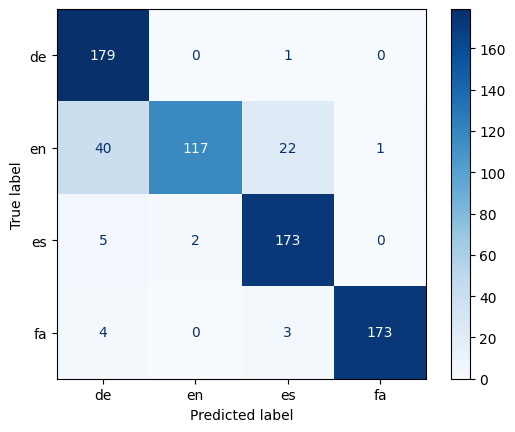

In [ ]:
show_confusion(model)

In [ ]:
print(model.history.history)

{}


In [ ]:
history = {
    'loss' : [0.8661,0.4459,0.2446,0.1553,0.1172,0.0981,0.0766,0.0662,0.0558,0.0561,0.0539,0.0510,0.0485,0.0452,0.0397,],
    'val_loss' : [1.0861,0.4264,0.9657,0.3852,0.3165,0.1170,0.0872,0.1162,0.0721,0.1256,0.1350,0.1267,0.1213,0.2645,0.0545,],
    'accuracy' : [0.5919,0.8331,0.9156,0.9476,0.9614,0.9667,0.9747,0.9781,0.9820,0.9814,0.9814,0.9821,0.9833,0.9845,0.9858,],
    'val_accuracy' :[0.5766,0.8338,0.6865,0.8553,0.8756,0.9599,0.9708,0.9599,0.9755,0.9551,0.9499,0.9566,0.9541,0.9131,0.9815,],
}

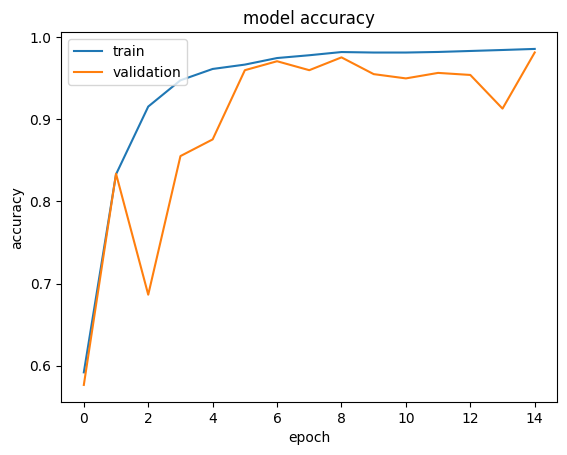

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

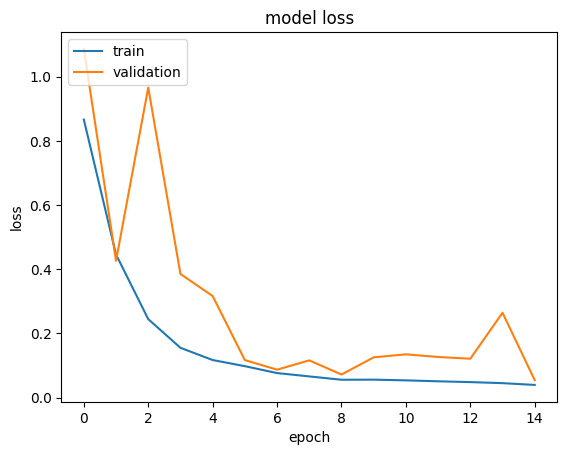

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()